In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
from scipy.optimize import rosen

In [2]:
from pypoptim.algorythm import Solution
from pypoptim.algorythm.ga import GA

# Simple example

In [3]:
def error(x):
    return rosen(x)

class Sol(Solution):
    
    def update(self):
        self._y = error(self.x)
        
    def is_valid(self):
        return self.is_updated()

In [4]:
ndim = 10
bounds = np.tile([-5, 5], (ndim, 1))

ga_optim = GA(Sol, bounds)

In [5]:
ga_optim

GA:
[bounds_lower bounds_upper gammas mask_log_10_scale]
[[-5  5  1  0]
 [-5  5  1  0]
 [-5  5  1  0]
 [-5  5  1  0]
 [-5  5  1  0]
 [-5  5  1  0]
 [-5  5  1  0]
 [-5  5  1  0]
 [-5  5  1  0]
 [-5  5  1  0]]
mutation_rate: 1.0
crossover_rate: 1.0
selection_force: 2
keys_data_transmit: []

  0%|          | 0/3 [00:00<?, ?it/s]

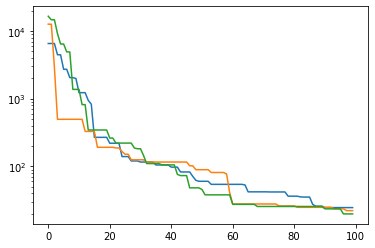

In [6]:
n_solutions = 100
n_elites = 5
n_epochs = 100

for _ in tqdm(range(3)):
    
    population = ga_optim.generate_population(n_solutions)

    loss = []

    for i in range(n_epochs):
        
        ga_optim.update_population(population)
            
        loss.append(min(population).y)
            
        elites  = ga_optim.get_elites(population, n_elites)
        mutants = ga_optim.get_mutants(population, n_solutions - n_elites)
        
        population = elites + mutants

    plt.semilogy(loss)

In [7]:
ga_optim.update_population(population)
X = np.array([sol.x for sol in sorted(population)])
Y = np.array([sol.y for sol in sorted(population)])

In [8]:
X[0]

array([-0.35732284,  0.14422095,  0.05441941, -0.09045686,  0.03118584,
       -0.2306806 ,  0.15122956,  0.19027658, -0.00933692,  0.00328382])

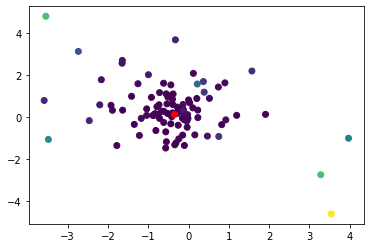

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.plot(X[0, 0], X[0, 1], 'or')